# Programming for Data Analysis - Project 2


Order of Business:
- ~~Join CO2 datasets into single pandas dataframe spanning 800K years to present.~~
- ~~Join temperature datasets into single pandas dataframe spanning 800K years to present.~~
- ~~Investigate Jouzel's temperature anomoly calculations.~~
- ~~Join datasets for one other feature (CH4 or polar ice coverage) into single pandas dataframe spanning 800K years to present.~~
- ~~Join datsets for temperature and rainfall in Ireland into single pandas dataframe.~~
- Join all above datsets into single pandas dataframe.
- Export datsets to csv and json formats.
- Graph CO2 vs temperature vs additional feature vs Irish data.
- Analyse the above for correlations, lead/lag, etc.
- Use linear regression to predict temperature change over coming decades.
- Look at recent data and analyse to see if recent increases have been linear or nonlinear.




Most recent CO2 data:
Lan, X., Tans, P. and K.W. Thoning: Trends in globally-averaged CO2 determined from NOAA Global Monitoring Laboratory measurements. Version 2023-12 https://doi.org/10.15138/9N0H-ZH07


In [1]:
# Import packages useful for data importing and analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a pandas datframe with IPCC CO2 data.
# co2_ipcc_clean.csv was created by taking data aggregate data and creating a new csv file using only that relevant data.
co2_ipcc = pd.read_csv('data/co2_ipcc_clean.csv')

# Column names for both datasets matched so they would join correctly. For some reason the first column of the IPCC dataset
# wouldn't change name so I used a different method.
co2_ipcc = co2_ipcc.rename(columns = {co2_ipcc.columns[0]:'year', 'CO2 (ppmv)':'mean', 'sigma mean CO2 (ppmv)':'sigma mean'})
co2_ipcc.head()

,year,mean,sigma mean
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04


In [3]:
# Create a pandas dataframe with NOAA data.

co2_noaa = pd.read_csv('data/co2_annmean_gl.csv', skiprows=37)
#co2_noaa

co2_noaa = co2_noaa.rename(columns = {'unc':'sigma mean'})

# Matching year column with IPCC data.
co2_noaa.iloc[:,0] = 1950 - co2_noaa.iloc[:,0]
co2_noaa.head()

,year,mean,sigma mean
0,-29,336.85,0.11
1,-30,338.91,0.07
2,-31,340.11,0.09
3,-32,340.85,0.03
4,-33,342.53,0.06


Text(0, 0.5, 'Atmospheric CO2')

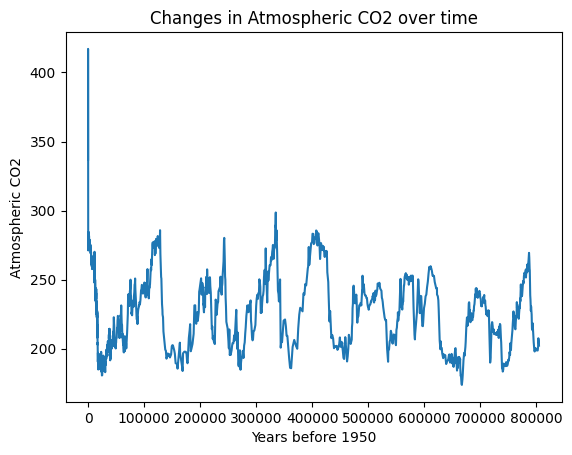

In [4]:
co2 = pd.concat([co2_noaa,co2_ipcc], ignore_index=True)
#co2 = [co2_noaa,co2_ipcc]
co2.head()
co2.tail()

plt.plot(co2['year'], co2['mean'])
plt.title('Changes in Atmospheric CO2 over time')
plt.xlabel('Years before 1950')
plt.ylabel('Atmospheric CO2')

In [5]:
temp_jouzel = pd.read_excel('data/temp_jouzel.xls')
temp_jouzel = temp_jouzel.drop(['bag', 'ztop', 'EDC3béta', 'deutfinal', 'acc-EDC3beta'], axis=1)
temp_jouzel = temp_jouzel.rename(columns={'AICC2012':'Age', 'temp':'Temperature'})
# Convert temperature from Kelvin to Celsius
# temp_jouzel.iloc[:,1] = temp_jouzel.iloc[:,1] - 273.15

# Finding average temperature of last 1000 years
avg_temp_range = (temp_jouzel.iloc[0:93,1])
avg_temp = (avg_temp_range.sum())/93
print(avg_temp)
temp_jouzel.tail()
#plt.plot(temp_jouzel['Age'], temp_jouzel['Temperature'])


217.38602150537636


,Age,Temperature
5814,817562.0,211.0
5815,818631.0,211.2
5816,819700.0,211.3
5817,820769.0,211.4
5818,821838.0,211.4


In [6]:
# Some minor cleaning of this file type was done to more easily import into the notebook. The .txt file was first downloaded,
# then extraneous data at the top of the file was removed.
# Data was then imported into excel, keeping format as Text to avoid losing data.
# The data was then exported from Excel as a CSV.

temp_noaa = pd.read_csv('data/temp_noaa_clean.csv')
temp_noaa = temp_noaa.drop(['Bag', 'ztop', 'Deuterium'], axis=1)
temp_noaa.iloc[:,1] = temp_noaa.iloc[:,1] + avg_temp

temp_noaa.tail()



,Age,Temperature
5795,797408.0,208.656022
5796,798443.0,208.846022
5797,799501.0,208.506022
5798,800589.0,208.466022
5799,801662.0,208.566022


In [7]:
temp = pd.concat([temp_noaa,temp_jouzel], ignore_index=True)
temp.sort_values('Age')
temp.tail()

,Age,Temperature
11614,817562.0,211.0
11615,818631.0,211.2
11616,819700.0,211.3
11617,820769.0,211.4
11618,821838.0,211.4


Text(0, 0.5, 'Temperature (degrees Kelvin)')

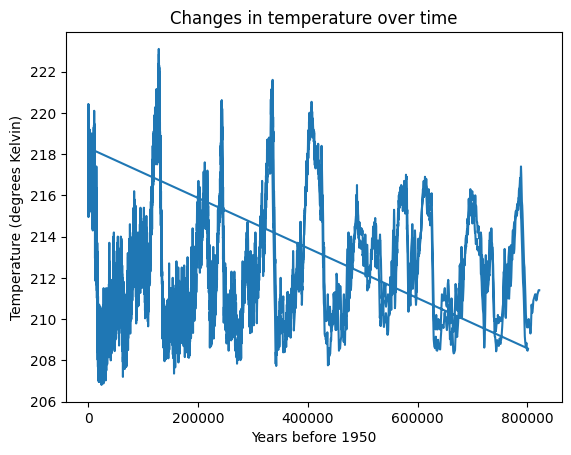

In [8]:
plt.plot(temp['Age'], temp['Temperature'])
plt.title('Changes in temperature over time')
plt.xlabel('Years before 1950')
plt.ylabel('Temperature (degrees Kelvin)')

Methane data found at:
- https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/noaa-icecore-15076/html
- Lan, X., K.W. Thoning, and E.J. Dlugokencky: Trends in globally-averaged CH4, N2O, and SF6 determined from NOAA Global Monitoring Laboratory measurements. Version 2023-12, https://doi.org/10.15138/P8XG-AA10
- https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-icecore-9959

In [9]:
ch4_aicc = pd.read_csv('data/aicc2012_ch4.csv')
ch4_aicc = ch4_aicc.drop(['depth (m)'], axis=1)
ch4_aicc = ch4_aicc.rename(columns={'gas age (a B1950)':'Age', 'CH4 (ppbv)':'CH4 (ppb)'})
ch4_aicc.head()

,Age,CH4 (ppb)
0,194.417,907
1,349.004,784
2,349.382,762
3,351.595,710
4,370.178,727


In [10]:
ch4_law = pd.read_excel('data/law2006.xls', sheet_name='CH4 by age', usecols='A:D')
# Convert to B1950 scale used elsewhere
ch4_law.iloc[:,1] = 1950 - ch4_law.iloc[:,1]
ch4_law = ch4_law.drop(['Sample Type', 'CH4 (ppb) - NOAA04 Scale'], axis = 1)
ch4_law = ch4_law.rename(columns={'CH4 gas age years AD':'Age'})
ch4_law.head()

,Age,CH4 (ppb)
0,-54.461749,1708.842301
1,-54.054645,1707.299996
2,-53.386301,1709.650905
3,-53.200000,1707.224783
4,-53.161644,1706.182243


In [11]:
ch4_noaa = pd.read_csv('data/ch4_annmean_gl.csv', skiprows=43)
# Convert to B1950 scale used elsewhere.
ch4_noaa.iloc[:,0] = 1950 - ch4_noaa.iloc[:,0]
ch4_noaa = ch4_noaa.drop(['unc'], axis=1)
ch4_noaa = ch4_noaa.rename(columns={'year':'Age', 'mean':'CH4 (ppb)'})
ch4_noaa.tail()

,Age,CH4 (ppb)
34,-68,1857.33
35,-69,1866.58
36,-70,1878.93
37,-71,1895.28
38,-72,1911.83


Text(0, 0.5, 'Atmospheric CH4 (ppb)')

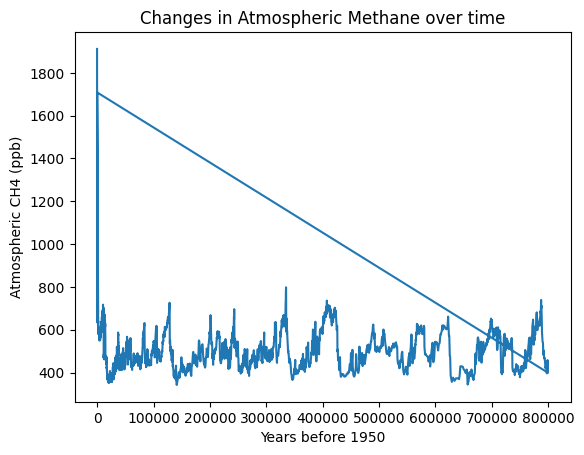

In [12]:
ch4 = pd.concat([ch4_aicc, ch4_law, ch4_noaa], ignore_index=True)
ch4.tail()

plt.plot(ch4['Age'], ch4['CH4 (ppb)'])
plt.title('Changes in Atmospheric Methane over time')
plt.xlabel('Years before 1950')
plt.ylabel('Atmospheric CH4 (ppb)')

Rainfall data found at: https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-network-1.zip
Temperature data found at: https://www.met.ie/cms/assets/uploads/2023/12/LongTermTemperatures_1900-2022_annual.csv


In [13]:
temp_ireland = pd.read_csv('data/LongTermTemperatures_1900-2022_annual.csv')
temp_ireland = temp_ireland.rename(columns={'year':'Year'})
# Remove non common years
temp_ireland = temp_ireland.iloc[6:122,:]
print(temp_ireland)

     Year  Annual
6    2016    10.3
7    2015     9.9
8    2014    10.5
9    2013    10.0
10   2012    10.0
..    ...     ...
117  1905     9.3
118  1904     9.1
119  1903     9.1
120  1902     9.2
121  1901     9.1

[116 rows x 2 columns]


In [14]:
rain_ireland = pd.read_csv('data/IOI_1711_SERIES.CSV')
# Average monthly values to get yearly mean rainfall.
rain_ireland = rain_ireland.groupby(['Year']).mean()
rain_ireland = rain_ireland.drop(['Month'], axis = 1)
# Reverse order of dataframe to match temperature.
rain_ireland = rain_ireland.iloc[::-1]
print(rain_ireland)

      Median montly series
Year                      
2016             88.391667
2015            112.166667
2014            105.225000
2013             93.041667
2012             98.641667
...                    ...
1715            104.833333
1714             73.683333
1713             81.875000
1712            104.383333
1711             90.966667

[306 rows x 1 columns]


In [15]:
irish_data = temp_ireland.join(rain_ireland, on='Year')
irish_data = irish_data.rename(columns={'Annual':'Temperature', 'Median montly series':'Rainfall'})
print(irish_data)

     Year  Temperature    Rainfall
6    2016         10.3   88.391667
7    2015          9.9  112.166667
8    2014         10.5  105.225000
9    2013         10.0   93.041667
10   2012         10.0   98.641667
..    ...          ...         ...
117  1905          9.3   77.658333
118  1904          9.1   87.016667
119  1903          9.1  111.266667
120  1902          9.2   82.750000
121  1901          9.1   85.500000

[116 rows x 3 columns]


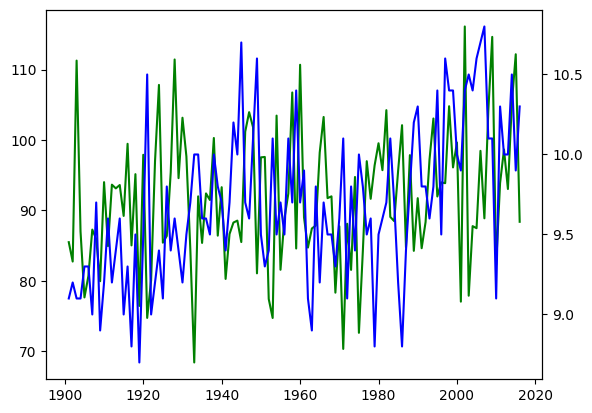

In [16]:
# Plotting method found at: https://stackoverflow.com/questions/41825939/plot-pandas-dataframe-two-columns

fig, ax1 = plt.subplots()

x = irish_data['Year']
y1 = irish_data['Rainfall']
y2 = irish_data['Temperature']

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

In [22]:
'''
Dataframes to be joined:
irish_data
ch4
temp
co2

'''
# Rename columns based on dataset
irish_data = irish_data.rename(columns={'Year':'irish_age', 'Rainfall':'irish_rainfall', 'Temperature':'irish_temperature'})
# Scale irish dataset dates to same as other datasets.
irish_data.iloc[:,0] = 1950 - irish_data.iloc[:,0]
print(irish_data)

     irish_age  irish_temperature  irish_rainfall
6          -66               10.3       88.391667
7          -65                9.9      112.166667
8          -64               10.5      105.225000
9          -63               10.0       93.041667
10         -62               10.0       98.641667
..         ...                ...             ...
117         45                9.3       77.658333
118         46                9.1       87.016667
119         47                9.1      111.266667
120         48                9.2       82.750000
121         49                9.1       85.500000

[116 rows x 3 columns]


In [24]:
ch4 = ch4.rename(columns={'Age':'ch4_age', 'CH4 (ppb)':'global_ch4'})
print(ch4)

      ch4_age  global_ch4
0     194.417      907.00
1     349.004      784.00
2     349.382      762.00
3     351.595      710.00
4     370.178      727.00
...       ...         ...
2468  -68.000     1857.33
2469  -69.000     1866.58
2470  -70.000     1878.93
2471  -71.000     1895.28
2472  -72.000     1911.83

[2473 rows x 2 columns]


In [28]:
temp = temp.rename(columns={'Age':'temp_age', 'Temperature':'global_temp'})
print(temp)

           temp_age  global_temp
0         -50.00000          NaN
1         -43.54769          NaN
2         -37.41829          NaN
3         -31.61153          NaN
4         -24.51395          NaN
...             ...          ...
11614  817562.00000        211.0
11615  818631.00000        211.2
11616  819700.00000        211.3
11617  820769.00000        211.4
11618  821838.00000        211.4

[11619 rows x 2 columns]


In [32]:
co2 = co2.rename(columns={'year':'co2_age', 'mean':'global_co2'})
print(co2)

        co2_age  global_co2  sigma mean
0        -29.00      336.85        0.11
1        -30.00      338.91        0.07
2        -31.00      340.11        0.09
3        -32.00      340.85        0.03
4        -33.00      342.53        0.06
...         ...         ...         ...
1939  803709.25      202.65        1.04
1940  803925.28      202.92        2.06
1941  804009.87      207.50        0.92
1942  804522.67      204.86        1.64
1943  805132.44      202.23        0.69

[1944 rows x 3 columns]


In [33]:
df = irish_data.join(ch4)
df = df.join(temp)
df = df.join(co2)
print(df)

     irish_age  irish_temperature  irish_rainfall   ch4_age  global_ch4  \
6          -66               10.3       88.391667   390.080       683.0   
7          -65                9.9      112.166667   473.595       679.0   
8          -64               10.5      105.225000   512.812       676.0   
9          -63               10.0       93.041667   536.004       651.0   
10         -62               10.0       98.641667   539.237       684.0   
..         ...                ...             ...       ...         ...   
117         45                9.3       77.658333  5086.260       573.0   
118         46                9.1       87.016667  5086.420       568.0   
119         47                9.1      111.266667  5212.040       561.0   
120         48                9.2       82.750000  5287.460       563.0   
121         49                9.1       85.500000  5320.620       551.0   

       temp_age  global_temp  co2_age  global_co2  sigma mean  
6     -10.95945          NaN   -35.